# Table of Contents

01. Import Libraries
02. Import Data
03. Task 4.9 Part 2

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [4]:
path = r'C:\Users\cmkep\Cathy\2022 Instacart Basket Analysis'

In [5]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 03. Task 4.9 Part 2

#Step 2: See Exercise 4.9 Notebook

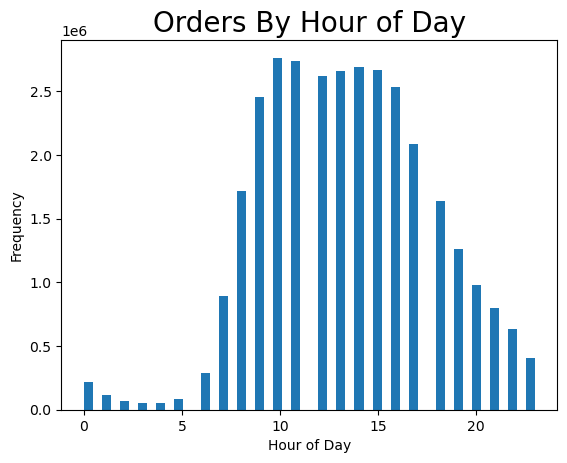

In [6]:
#Step 3: create histogram
hist_hod_2 = ords_prods_all['order_hour_of_day'].plot.hist(bins = 50)
plt.title('Orders By Hour of Day', fontsize = 20)
plt.xlabel("Hour of Day")
plt.show()

Step 3: The most common time of day to shop is between the hours of 9AM-5PM.

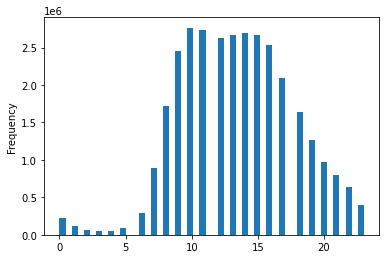

In [6]:
#save image as "hist_hod"
hist_hod = ords_prods_all['order_hour_of_day'].plot.hist(bins = 50)

In [7]:
#save image to Visualizations folder
hist_hod_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hod.png'))

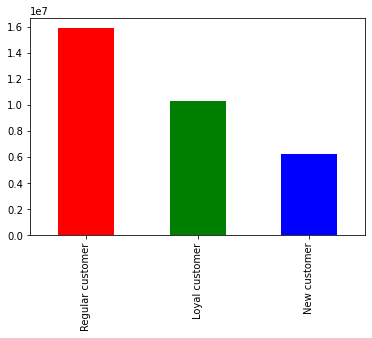

In [10]:
#Step 4: create bar chart
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['red','green','blue'])

In [11]:
#save image to Visualizations folder
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [9]:
#Step 5: create sample subset
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [10]:
dev

array([False,  True, False, ..., False,  True,  True])

In [11]:
#big = true values(those <0.7) and small = false values (those >0.7)
big = ords_prods_all[dev]
small = ords_prods_all[~dev]

In [15]:
len(ords_prods_all)

32434212

In [16]:
len(big) + len(small)

32434212

In [12]:
#save time and memory by only looking at needed columns for line chart
df_line = small[['order_hour_of_day','prices']]

In [18]:
df_line.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


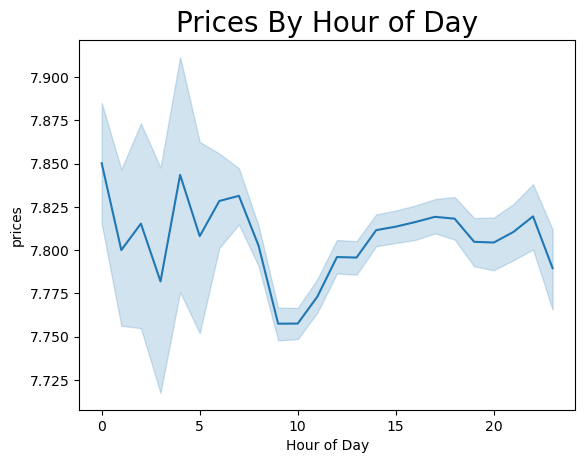

In [13]:
#create line chart
hour_price_line = sns.lineplot(data = df_line, x = 'order_hour_of_day',y = 'prices')
plt.title('Prices By Hour of Day', fontsize = 20)
plt.xlabel("Hour of Day")
plt.show()

Step 5: Prices are around peak between midnight and 5AM - this could be due to emergency grocery needs, these are not typical grocery shopping hours. They dip between 6-10AM - this could be when people are going to work so sales drop. They steadily increase back to around peak throughout rest of the day.

In [14]:
#save image to Visualizations folder
hour_price_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_price_line.png'))

In [22]:
#Step 6. save time and memory by only looking at needed columns for line chart
df_line_2 = small[['age','#_dependants']]

In [23]:
df_line_2.head()

,age,#_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


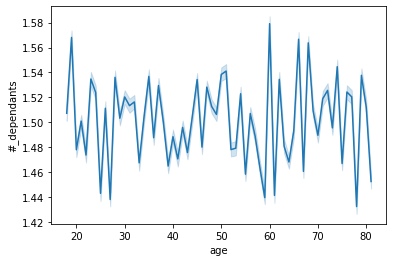

In [26]:
#create line chart
age_dep_line = sns.lineplot(data = df_line_2, x = 'age',y = '#_dependants')

#Step 6: The chart appears to show that the average number of dependents for all ages is between 1 and 2. 

In [27]:
#save image to Visualizations folder
age_dep_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dep_line.png'))

In [28]:
#Step 7. save time and memory by only looking at needed columns for line chart
df_line_3 = small[['age','income']]

In [29]:
df_line_3.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


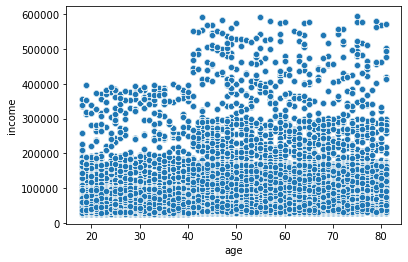

In [30]:
age_income_scatter = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_all)

Step 7: The majority of user ages have at least an income of <$10-$30K. Users aged 40 and above are the only age group to make above $40K. 

In [31]:
#save image to Visualizations folder
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatter.png'))

In [32]:
#export
ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers(2).pkl'))